# KPI(Key Performance Index) - 핵심 성과 지표

## 메트릭 Metric (측정 가능한 모든 수치)
- 방문자수, 클릭수, 매출액, 재고량
- 단순한 측정값
## 지표 Indicator (의미가 부여된 메트릭)
- 전월 대비 방문자 증가율, 클릭 전환률, 매출 성장률
- 비교 기준이 있고, 변화-방향성을 보여줌
## KPI (비즈니스 목표와 직결된 핵심 지표)
- CAC(고객 획득 비용), LTV(고객 생애 가치), NPS(순 고객 추천 지수)
- 전략적 의사결정에 직접 영향, 액션 가능한 인사이트 제공

## KPI가 비즈니스에 미치는 영향
1. 전략적 방향성 제시 KPI는 조직 전체가 같은 목표를 향해 나아갈 수 있도록 하는 나침반 역할을 합니다. 예를들어, SaaS 기업에서 'Monthly Revenue(MRR)'를 주요 KPI로 설정하면, 마케팅팀은 신규 고객 획득에, 제품팀은 기능 개선을, CS팀은 고객 유지에 집중하게 됩니다.

1. 데이터 기반 의사결정 문화 조성 "감(感)"이 아닌 "팩트"로 말하는 조직 문화를 만듭니다. 매주 월요일 아침, 임원진이 대시보드를 보여 "지난주 CAC가 20% 증가했네요. 마케팅 채널별 효율성을 재검토해야겠습니다" 라고 말할 수 있게 되는 것입니다.

## KPI 설계 원칙
- Specific(구체적)
- Measurable(측정가능)
- Achievable(달성가능)
- Relevant(관련성)
- Time-bound(시한성)

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings

warnings.filterwarnings('ignore', category=UserWarning)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['plt.unicode_minus'] = False
# 실습용 전자상거래 데이터 생성
np.random.seed(42)

# 고객 데이터 생성
customers = pd.DataFrame({
    'customer_id': range(1, 1001),
    'first_purchase_date': pd.date_range('2022-01-01', periods=1000, freq='D'),
    'acquisition_channel': np.random.choice(['organic', 'paid_search', 'social', 'email'], 1000, 
                                          p=[0.4, 0.3, 0.2, 0.1])
})

# 거래 데이터 생성 (더 현실적인 패턴)
transactions = []
for customer_id in range(1, 1001):
    first_date = customers[customers['customer_id'] == customer_id]['first_purchase_date'].iloc[0]
    
    # 고객별로 다른 구매 패턴 시뮬레이션
    purchase_frequency = np.random.exponential(30)  # 평균 30일마다 구매
    num_purchases = np.random.poisson(3) + 1  # 평균 3회 구매
    
    for i in range(num_purchases):
        purchase_date = first_date + timedelta(days=int(i * purchase_frequency))
        if purchase_date <= datetime(2024, 12, 31):
            transactions.append({
                'customer_id': customer_id,
                'purchase_date': purchase_date,
                'order_value': np.random.lognormal(4, 0.8),  # 로그정규분포로 현실적인 주문금액
                'order_id': len(transactions) + 1
            })

df = pd.DataFrame(transactions)
df['purchase_date'] = pd.to_datetime(df['purchase_date'])

print("데이터셋 개요")
print(f"총 고객 수: {len(customers):,}명")
print(f"총 거래 수: {len(df):,}건")
print(f"기간: {df['purchase_date'].min().date()} ~ {df['purchase_date'].max().date()}")

데이터셋 개요
총 고객 수: 1,000명
총 거래 수: 3,871건
기간: 2022-01-01 ~ 2024-12-28


## RFM 분석
고객을 3가지 측면에서 바라보는 프리즘
- Recency: 얼마나 최근에 구매하는가? (최근성)
- Frequency: 얼마나 자주 구매하는가? (반복성)
- Monetary: 얼마나 많이 구매하는가? (가치)

In [2]:
df.head(50)

,customer_id,purchase_date,order_value,order_id
0,1,2022-01-01,16.099022,1
1,1,2022-01-07,52.126636,2
2,1,2022-01-13,105.086917,3
3,1,2022-01-19,60.768899,4
4,1,2022-01-25,78.047045,5
5,1,2022-01-31,46.034085,6
6,1,2022-02-06,134.727679,7
7,1,2022-02-12,51.196306,8
8,2,2022-01-02,17.740889,9
9,2,2022-02-26,81.518230,10


In [3]:
def calculate_rfm(t_df: pd.DataFrame, analysis_date='2024-12-31'):
    """
    RFM 분석 함수

    Recency: 활성도 측정. 낮을수록 좋음
    Frequency: 충성도 측정. 높을수록 좋음
    Monetary: 가치 측정. 높을수록 좋음
    """
    analysis_date = pd.to_datetime(analysis_date)
    rfm = t_df.groupby('customer_id').agg({
        # Recency
        'purchase_date': lambda x: (analysis_date - x.max()).days,
        # Frequency
        'order_id': 'count',
        # Monetary
        'order_value': 'sum',
    }).reset_index()
    rfm.columns = ['customer_id', 'recency', 'frequency', 'monetary']
    # RFM 점수 계산
    rfm['r_score'] = pd.qcut(rfm['recency'], 5, labels=[5, 4, 3, 2, 1])
    rfm['f_score'] = pd.qcut(rfm['frequency'].rank(method='first'), 5, labels=[1, 2, 3, 4, 5])
    rfm['m_score'] = pd.qcut(rfm['monetary'], 5, labels=[1, 2, 3, 4, 5])

    rfm['rfm_score'] = rfm['r_score'].astype(str) + rfm['f_score'].astype(str) + rfm['m_score'].astype(str)
    return rfm


rfm_data = calculate_rfm(df)
rfm_data.head()


# 고객 세그먼트 정의
def segment_customers(rfm_data: pd.DataFrame):
    """
    RFM 점수를 기반으로 고객을 의미있는 세그먼트로 분류
    - R >= 4, F >= 4: 최고
    - R >= 3, F >= 3: 충성
    - R >= 4, F <= 2: 신규
    - R <= 2, F >= 3: 위험
    - R <= 2, F <= 2: 이탈
    - 기타
    """
    def rfm_level(df):
        if (df['r_score'] >= 4) and (df['f_score'] >= 4):
            return '최고'
        elif (df['r_score'] >= 3) and (df['f_score'] >= 3):
            return '충성'
        elif (df['r_score'] >= 4) and (df['f_score'] <= 2):
            return '신규'
        elif (df['r_score'] <= 2) and (df['f_score'] >= 3):
            return '위험'
        elif (df['r_score'] <= 2) and (df['f_score'] <= 2):
            return '이탈'
        else:
            return '기타'
    
    rfm_data['segment'] = rfm_data.apply(rfm_level, axis=1)
    return rfm_data

rfm_segmented = segment_customers(rfm_data)
rfm_segmented

,customer_id,recency,frequency,monetary,r_score,f_score,m_score,rfm_score,segment
0,1,1053,8,544.086589,1,5,5,155,위험
1,2,983,3,122.971850,1,1,1,111,이탈
2,3,1055,2,325.510131,1,1,4,114,이탈
3,4,1046,5,454.940546,1,4,5,145,위험
4,5,954,8,269.436813,1,5,3,153,위험
...,...,...,...,...,...,...,...,...,...
995,996,19,4,408.573012,5,4,4,544,최고
996,997,86,3,403.810587,5,3,4,534,충성
997,998,95,5,303.249620,5,5,3,553,최고
998,999,3,4,250.638024,5,4,3,543,최고


In [4]:
# segment 로 그룹핑 해서 분석
segment_analysis = rfm_segmented.groupby('segment').agg({
    'customer_id': 'count',
    'recency': 'mean',  # 등급별 최종방문일로부터 지난날 평균
    'frequency': 'mean',  # 방문 회수 평균
    'monetary': 'mean',  # 쓴돈 평균
}).round(2)


segment_analysis.columns = ['고객수', '지난날평균', '회수평균', '돈평균']

segment_analysis

,고객수,지난날평균,회수평균,돈평균
segment,,,,
기타,87,512.67,2.40,163.01
신규,121,251.12,2.45,195.11
위험,208,811.88,5.03,383.14
이탈,192,837.06,2.36,181.27
최고,208,205.57,5.05,379.44
충성,184,391.96,4.44,345.49


In [5]:
segment_insights = {
    '최고': '💎 최고의 고객들. VIP 프로그램과 개인화된 서비스 제공',
    '충성': '🏆 충성도 높은 고객들. 추가 상품 추천과 리워드 프로그램',
    '신규': '🌱 신규 고객들. 온보딩 프로그램과 첫 구매 할인',
    '위험': '⚠️ 이탈 위험 고객들. 재활성화 캠페인과 특별 할인',
    '이탈': '😢 이탈한 고객들. 윈백 캠페인과 강력한 인센티브'
}

print("\n💡 세그먼트별 액션 플랜")
print("=" * 50)
for segment, insight in segment_insights.items():
    if segment in rfm_segmented['segment'].values:
        count = len(rfm_segmented[rfm_segmented['segment'] == segment])
        print(f"{segment} ({count}명): {insight}")


💡 세그먼트별 액션 플랜
최고 (208명): 💎 최고의 고객들. VIP 프로그램과 개인화된 서비스 제공
충성 (184명): 🏆 충성도 높은 고객들. 추가 상품 추천과 리워드 프로그램
신규 (121명): 🌱 신규 고객들. 온보딩 프로그램과 첫 구매 할인
위험 (208명): ⚠️ 이탈 위험 고객들. 재활성화 캠페인과 특별 할인
이탈 (192명): 😢 이탈한 고객들. 윈백 캠페인과 강력한 인센티브


In [6]:
# 고객 생애 가치(Customer Lifetime Value)
def calculate_clv(t_df: pd.DataFrame):
    """
    고객 생애 가치(Customer Lifetime Value) 계산

    CLV = (평균 주문 가치) * (연간 구매 빈도) * (고객 생존 기간)
    해석:
    - CLV > CAC(고객획득비용) : 수익성 있는 고객
    - CLV / CAC 비율이 3:1 이상이면 좋은 비즈니스
    """

    # 1. 평균 주문 가치
    avg_order_value = t_df.groupby('customer_id')['order_value'].mean()

    # 2. 연간 구매 빈도(구매 주기)
    def get_annual_purchase(x):
        # 1회 이상 구매한 경우
        if len(x) > 1:
            # 1년에 몇번정도 사느냐
            return len(x) / ((x['purchase_date'].max() - x['purchase_date'].min()).days + 1) * 365
        # 1회 구매자는 그냥 1
        else:
            return 1
    purchase_frequency = t_df.groupby('customer_id').apply(get_annual_purchase)

    # 3. 고객 생존 기간 -> 실제로는 더 정교한 생존 분석 사용
    lifespan_days = t_df.groupby('customer_id').apply(
        lambda x: (x['purchase_date'].max() - x['purchase_date'].min()).days + 1
    )
    
    # clv 계산
    clv_data = pd.DataFrame({
        'customer_id': avg_order_value.index,
        'avg_order_value': avg_order_value.values,
        'purchase_frequency': purchase_frequency.values,
        'lifespan_days': lifespan_days.values,
    })

    clv_data['clv'] = clv_data['avg_order_value'] * clv_data['purchase_frequency'] * (clv_data['lifespan_days'] / 365)
    return clv_data


clv_df = calculate_clv(df)

C:\Users\배성우\AppData\Local\Temp\ipykernel_14980\184045907.py:24: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  purchase_frequency = t_df.groupby('customer_id').apply(get_annual_purchase)
C:\Users\배성우\AppData\Local\Temp\ipykernel_14980\184045907.py:27: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  lifespan_days = t_df.groupby('customer_id').apply(


평균 CLV: $ 290.89
중앙값 CLV: $ 264.77
상위 10% 고객 커트라인: $ 526.87


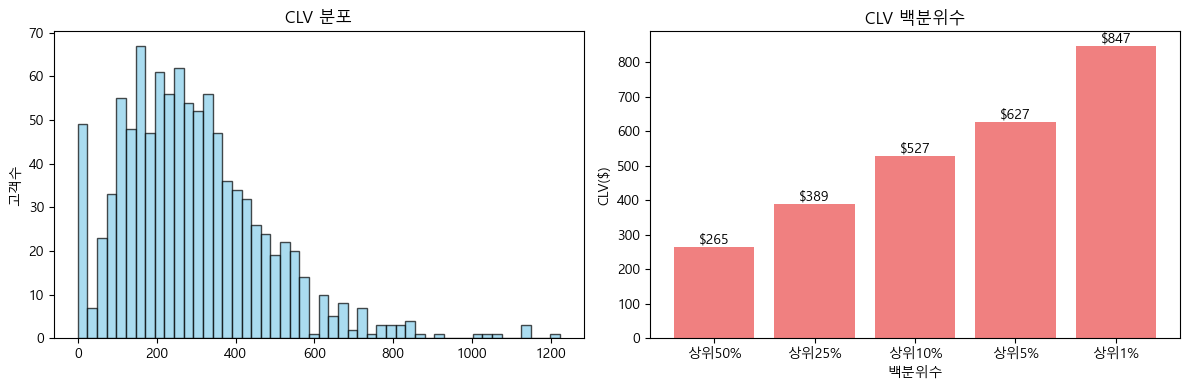

In [7]:
print(f'평균 CLV: $ {clv_df['clv'].mean():.2f}')
print(f'중앙값 CLV: $ {clv_df['clv'].median():.2f}')
print(f'상위 10% 고객 커트라인: $ {clv_df['clv'].quantile(0.9):.2f}')
print('=' * 50)

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.hist(clv_df['clv'], bins=50, alpha=0.7, color='skyblue', edgecolor='black')
plt.title('CLV 분포')
plt.ylabel('고객수')



plt.subplot(1, 2, 2)
clv_percentiles = [50, 75, 90, 95, 99]
clv_values = [clv_df['clv'].quantile(p/100) for p in clv_percentiles]
plt.bar(range(len(clv_percentiles)), clv_values, color='lightcoral')
plt.title('CLV 백분위수')
plt.xlabel('백분위수')
plt.xticks(range(len(clv_percentiles)), [f'상위{100-x}%' for x in clv_percentiles])
plt.ylabel('CLV($)')

for idx, value in enumerate(clv_values):
    # idx(x좌표)에, y좌표 막대 꼭대기 바로 위(+10 임의지정)에 표시, 뭐라고 쓸지, 좌우정렬
    plt.text(idx, value + 10, f'${value:.0f}', ha='center')


plt.tight_layout()
plt.show()


In [8]:
# 파레토 법칙 검증 (20% 고객이 80% 매출을 만드나?)

# CLV 내림차순으로 정렬
clv_sorted = clv_df.sort_values('clv', ascending=False).reset_index()
# 누적 CLV 컬럼 추가
clv_sorted['cum_clv'] = clv_sorted['clv'].cumsum()
# 해당 고객까지가 전체의 몇% 인지 컬럼 추가
clv_sorted['cum_clv_pct'] = clv_sorted['cum_clv'] / clv_sorted['clv'].sum() * 100
# 모든 고객 옆에 상위 몇% 인지 컬럼 추가
clv_sorted['customer_pct'] = (clv_sorted.index + 1) / len(clv_sorted) * 100

# CLV 정렬 기준 상위 20% 고객들만 보는 DF
upper_20p = clv_sorted[clv_sorted['customer_pct'] <= 20]

# 20% 고객까지의 누적 CLV
top20rev = upper_20p['cum_clv_pct'].iloc[-1]

print(f'파레토 분석 결과: 상위 20% 고객이 {top20rev:.2f}% 매출을 차지')

파레토 분석 결과: 상위 20% 고객이 39.26% 매출을 차지


## 코호트(Cohort) 분석
- 공통된 특성/경험을 가진 집단
- 특정 시점이나 조건을 기준으로 고객 집단을 추적
- 시간에 따라 행동 패턴의 변화를 분석

📊 코호트 분석 - 고객 유지율
각 셀은 해당 코호트의 고객 유지율을 나타냅니다.
예: 첫 구매 후 3개월째 평균 유지율: 25.3%


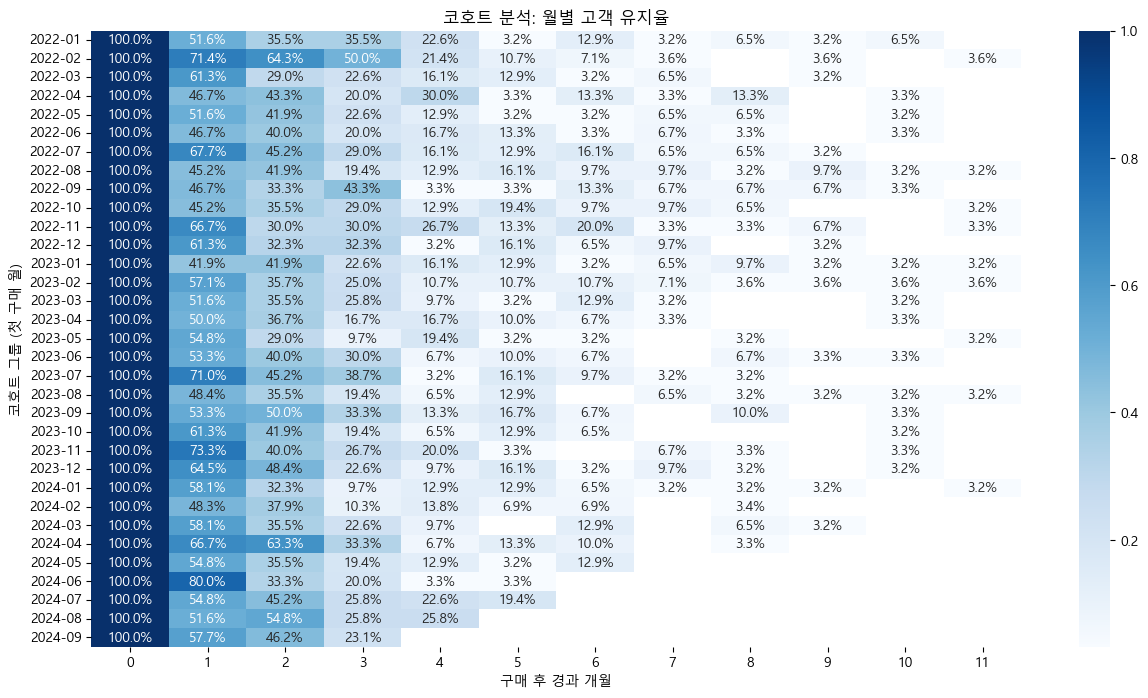


💡 코호트 분석 인사이트
1개월 후 평균 유지율: 56.7%
3개월 후 평균 유지율: 25.3%
6개월 후 평균 유지율: 8.8%


In [9]:
t_cohort = df.copy()
t_cohort['purchase_period'] = t_cohort['purchase_date'].dt.to_period('M')

# 각 고객의 첫 구매 월
first_purchase = t_cohort.groupby('customer_id')['purchase_date'].min().dt.to_period('M')
first_purchase = first_purchase.reset_index()
first_purchase.columns = ['customer_id', 'cohort_group']

# 코호트 데이터 결합
t_cohort = t_cohort.merge(first_purchase, on='customer_id', how='inner')

# 기간 계산(첫 구매 이후 몇개월 째) -> 이상한 객체가 나왔기 때문에, 처리도 특이한 방법으로 진행
from operator import attrgetter
t_cohort['after_n'] = (t_cohort['purchase_period'] - t_cohort['cohort_group']).apply(attrgetter('n'))

# 모든 구매 데이터
cohort_data = t_cohort.groupby(['cohort_group', 'after_n'])['customer_id'].nunique().reset_index()

cohort_size = first_purchase.groupby('cohort_group')['customer_id'].nunique()
# 각 그룹(최초구매월) 이 N개월이 지났을 때, 총 구매횟수.
cohort_table = cohort_data.pivot(index='cohort_group', columns='after_n', values='customer_id')

# 각 그룹(최초구매월)별 유지율 계산
cohort_rate = cohort_table.divide(cohort_size, axis=0)


print("📊 코호트 분석 - 고객 유지율")
print("=" * 50)
print("각 셀은 해당 코호트의 고객 유지율을 나타냅니다.")
print(f"예: 첫 구매 후 3개월째 평균 유지율: {cohort_rate[3].mean():.1%}")

# 코호트 히트맵 시각화
plt.figure(figsize=(15, 8))
sns.heatmap(cohort_rate.iloc[:, :12], annot=True, fmt='.1%', cmap='Blues')
plt.title('코호트 분석: 월별 고객 유지율')
plt.xlabel('구매 후 경과 개월')
plt.ylabel('코호트 그룹 (첫 구매 월)')
plt.show()

# 코호트별 인사이트
print("\n💡 코호트 분석 인사이트")
print("=" * 50)
retention_1m = cohort_rate[1].mean()
retention_3m = cohort_rate[3].mean() 
retention_6m = cohort_rate[6].mean() if 6 in cohort_rate.columns else 0

print(f"1개월 후 평균 유지율: {retention_1m:.1%}")
print(f"3개월 후 평균 유지율: {retention_3m:.1%}")
if retention_6m > 0:
    print(f"6개월 후 평균 유지율: {retention_6m:.1%}")

# 유지율 개선 방안 제시
if retention_1m < 0.3:
    print("\n⚠️ 1개월 유지율이 낮습니다. 온보딩 프로세스 개선 필요")
if retention_3m < 0.15:
    print("⚠️ 3개월 유지율이 낮습니다. 고객 참여 프로그램 강화 필요")


In [13]:
# Month Over Month (전월대비)
# Year Over Year (전년대비)

"""
월별/연별 성장률 계산 및 트렌드 분석

성장률의 비즈니스적 의미:
- MoM(Month over Month): 단기 성장 모멘텀 파악
- YoY(Year Over Year): 계절성을 배제한 장기 성장 트렌드
"""

# MoM 성장률 ('order_value')

# YoY 성장률
# 시각화
# 성장률 진단

import pandas as pd
import matplotlib.pyplot as plt

df['purchase_date'] = pd.to_datetime(df['purchase_date'])

# 월별 매출 합계
df['year_month'] = df['purchase_date'].dt.to_period('M')
monthly_sales = df.groupby('year_month')['order_value'].sum().to_timestamp()

# MoM 성장률
monthly_sales_mom = monthly_sales.pct_change() * 100

# YoY 성장률 (12개월 간격 기준)
monthly_sales_yoy = monthly_sales.pct_change(periods=12) * 100

# 결과 테이블
result = pd.DataFrame({
    'total_sales': monthly_sales,
    'MoM(%)': monthly_sales_mom,
    'YoY(%)': monthly_sales_yoy
}).round(2)

from IPython.display import display
display(result)

,total_sales,MoM(%),YoY(%)
year_month,,,
2022-01-01,3687.60,NaN,NaN
2022-02-01,4206.77,14.08,NaN
2022-03-01,6322.14,50.28,NaN
2022-04-01,8844.63,39.90,NaN
2022-05-01,9673.02,9.37,NaN
2022-06-01,9638.85,-0.35,NaN
2022-07-01,7911.22,-17.92,NaN
2022-08-01,10064.30,27.22,NaN
2022-09-01,7772.74,-22.77,NaN


C:\Users\배성우\AppData\Local\Temp\ipykernel_14980\2288292686.py:50: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([result['MoM(%)'].dropna(), result['YoY(%)'].dropna()],


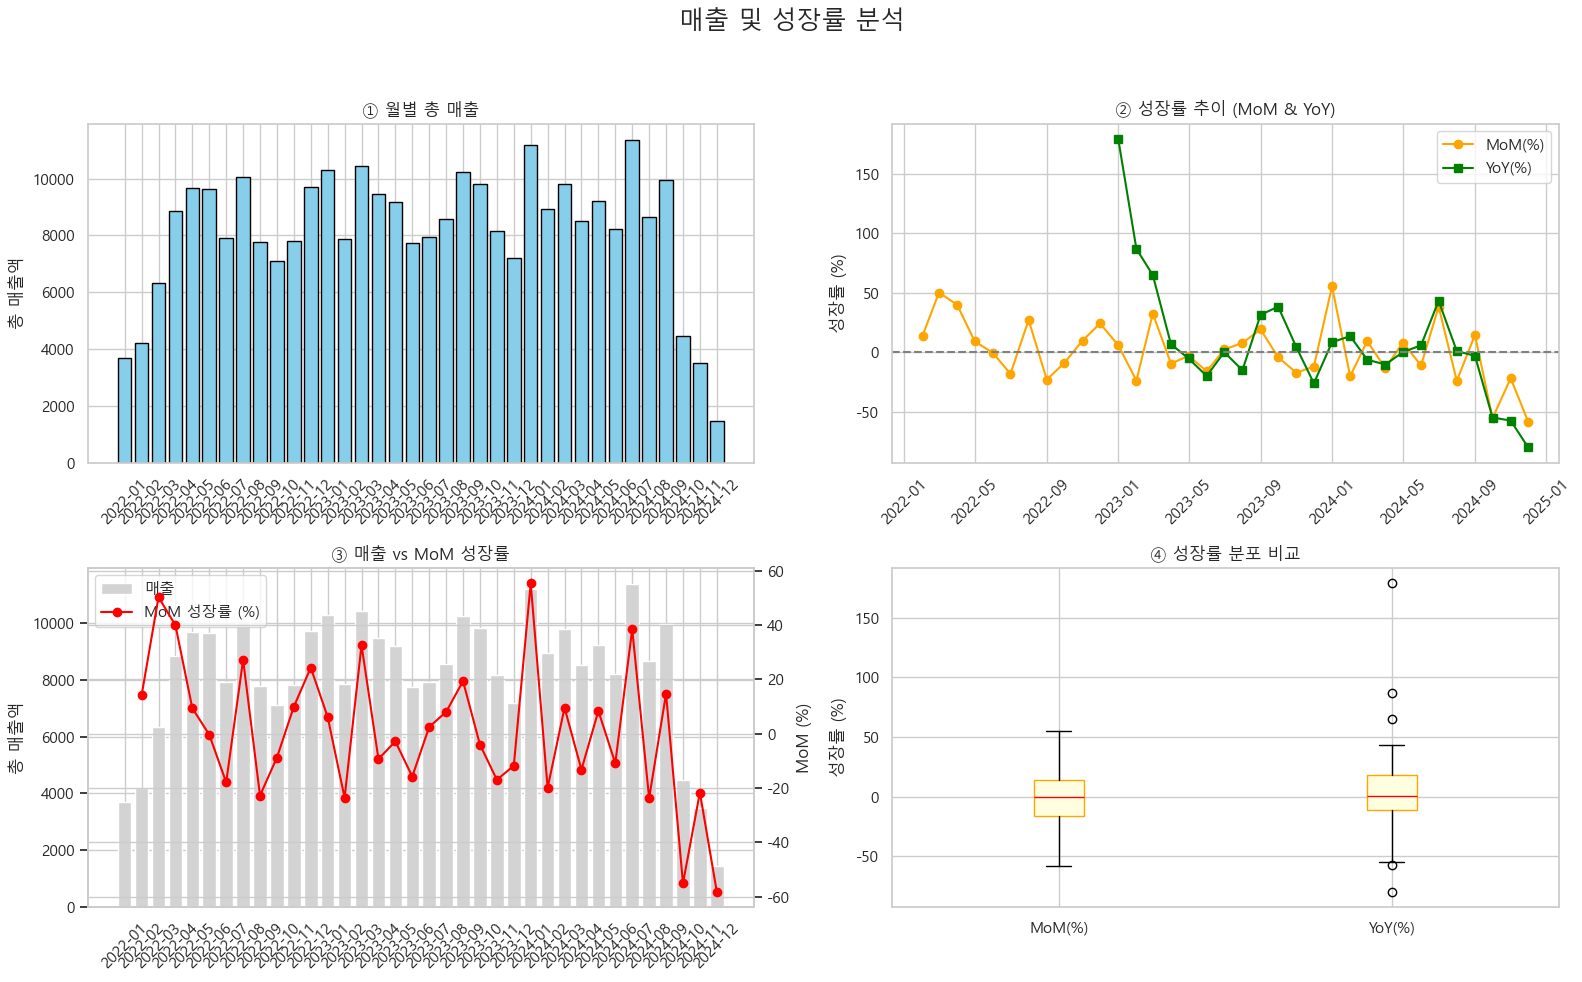

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 10))
plt.suptitle('매출 및 성장률 분석', fontsize=18)
plt.rcParams['font.family'] = 'Malgun Gothic'


# 1. 월별 매출
plt.subplot(2, 2, 1)
plt.bar(result.index.strftime('%Y-%m'), result['total_sales'], color='skyblue', edgecolor='black')
plt.title('① 월별 총 매출')
plt.ylabel('총 매출액')
plt.xticks(rotation=45)

# 2. MoM / YoY 성장률 추이
plt.subplot(2, 2, 2)
plt.plot(result.index, result['MoM(%)'], label='MoM(%)', marker='o', color='orange')
plt.plot(result.index, result['YoY(%)'], label='YoY(%)', marker='s', color='green')
plt.axhline(0, color='gray', linestyle='--')
plt.title('② 성장률 추이 (MoM & YoY)')
plt.ylabel('성장률 (%)')
plt.legend()
plt.xticks(rotation=45)

# 3. 매출 vs MoM 같이 보기 (막대 + 선, y축 분리)
plt.subplot(2, 2, 3)
ax1 = plt.gca()  # 현재 subplot의 axis 가져오기

# 막대 그래프: 매출
bars = ax1.bar(result.index.strftime('%Y-%m'), result['total_sales'],
               color='lightgray', label='매출')
ax1.set_ylabel('총 매출액')
ax1.set_title('③ 매출 vs MoM 성장률')
ax1.tick_params(axis='x', rotation=45)

# 선 그래프: MoM (두 번째 y축)
ax2 = ax1.twinx()
line = ax2.plot(result.index.strftime('%Y-%m'), result['MoM(%)'],
                color='red', marker='o', label='MoM 성장률 (%)')
ax2.set_ylabel('MoM (%)')

# 범례 병합
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')


# 4. 성장률 분포 Boxplot
plt.subplot(2, 2, 4)
plt.boxplot([result['MoM(%)'].dropna(), result['YoY(%)'].dropna()],
            labels=['MoM(%)', 'YoY(%)'],
            patch_artist=True,
            boxprops=dict(facecolor='lightyellow', color='orange'),
            medianprops=dict(color='red'))
plt.title('④ 성장률 분포 비교')
plt.ylabel('성장률 (%)')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


In [24]:
# 트렌드 분석

# 일별 매출 집계

# 다양한 기간의 이동평균 (주간, 월간, 분기)
# 일주일 매출 이동평균선 이용해서 분석
# 트렌드 방향성 분석
df.head(10)

,customer_id,purchase_date,order_value,order_id,year_month
0,1,2022-01-01,16.099022,1,2022-01
1,1,2022-01-07,52.126636,2,2022-01
2,1,2022-01-13,105.086917,3,2022-01
3,1,2022-01-19,60.768899,4,2022-01
4,1,2022-01-25,78.047045,5,2022-01
5,1,2022-01-31,46.034085,6,2022-01
6,1,2022-02-06,134.727679,7,2022-02
7,1,2022-02-12,51.196306,8,2022-02
8,2,2022-01-02,17.740889,9,2022-01
9,2,2022-02-26,81.518230,10,2022-02


최근 매출 추세는 상승 중입니다.


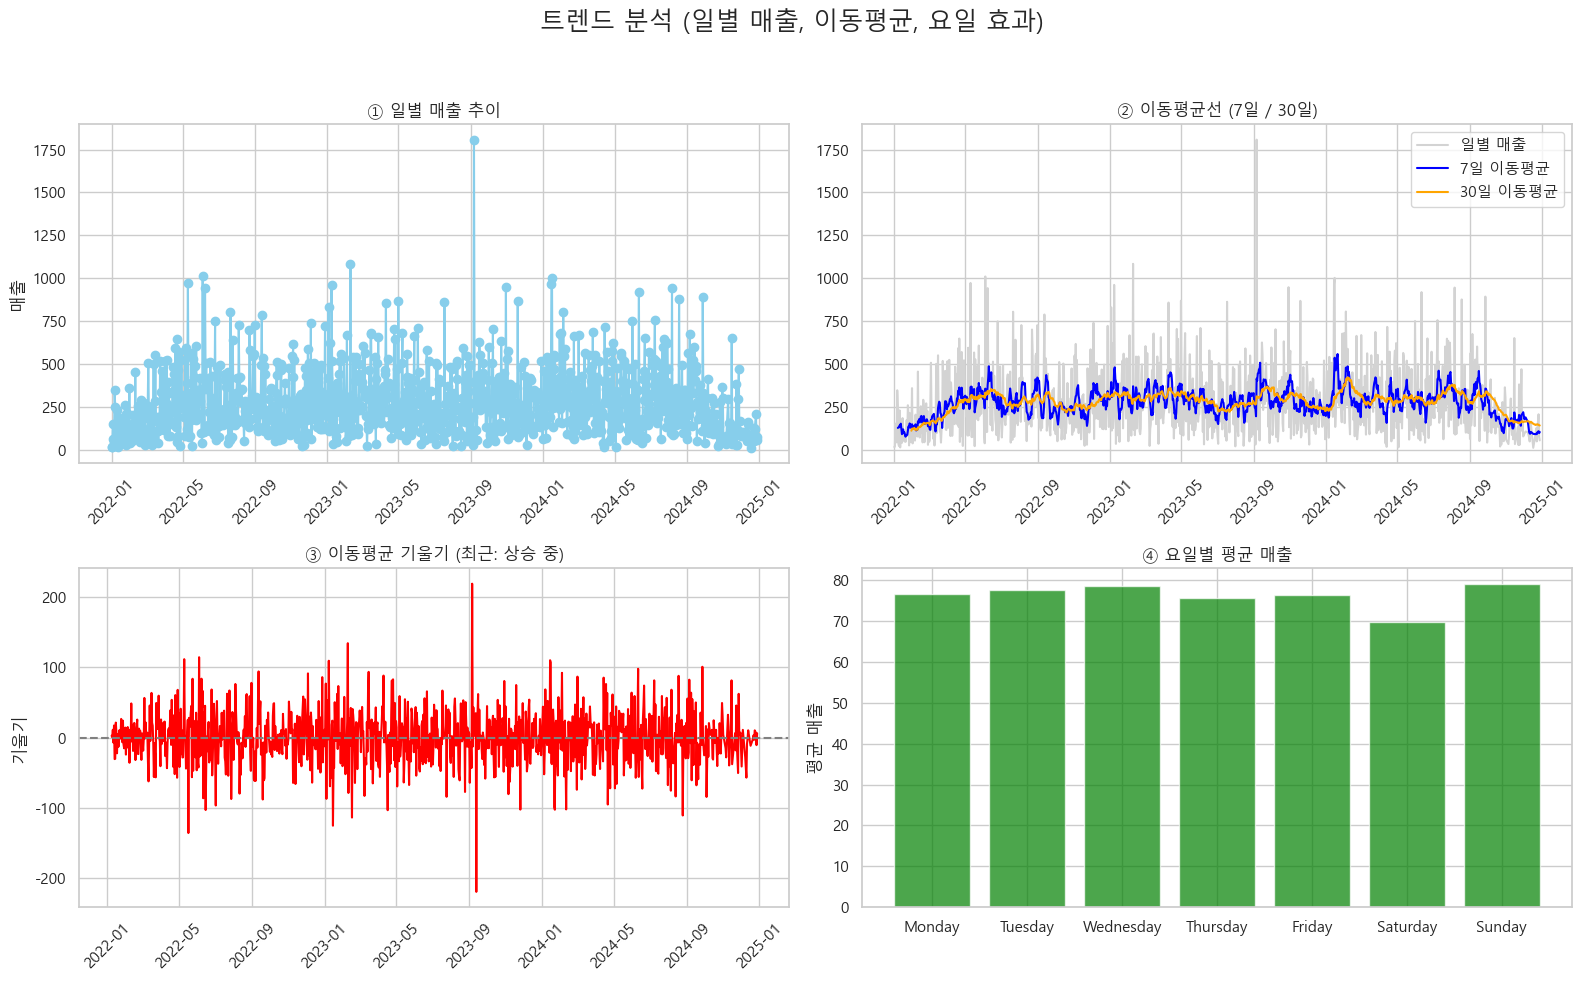

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# ✅ 윈도우 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'

df['purchase_date'] = pd.to_datetime(df['purchase_date'])

# ✅ 일별 매출 집계
daily_sales = df.groupby('purchase_date')['order_value'].sum().sort_index()

# ✅ 이동평균선 계산
ma7 = daily_sales.rolling(window=7).mean()
ma30 = daily_sales.rolling(window=30).mean()

# ✅ 이동평균선 기울기 (트렌드 방향성)
trend_slope = ma7.diff()
recent_slope = trend_slope[-7:].mean()
trend_direction = (
    "상승 중" if recent_slope > 0 else
    "하락 중" if recent_slope < 0 else
    "정체 상태"
)

# ✅ 요일별 평균 매출
df['weekday'] = df['purchase_date'].dt.day_name()
weekday_avg = df.groupby('weekday')['order_value'].mean().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
])

# 이동 평균선의 변화율
trend_slope = ma7.diff()

# 최근 7일 동안의 평균 기울기
recent_trend = trend_slope[-7:].mean()
if recent_trend > 0:
    print("최근 일주일 매출 추세는 상승 중입니다.")
elif recent_trend < 0:
    print("최근 일주일 매출 추세는 하락 중입니다.")
else:
    print("최근 일주일 매출 추세는 정체 상태입니다.")

# ✅ 시각화 (subplot)
import matplotlib.pyplot as plt

# 시각화
plt.figure(figsize=(16, 10))
plt.suptitle('트렌드 분석 (일별 매출, 이동평균, 요일 효과)', fontsize=18)

# ① 일별 매출 추이
plt.subplot(2, 2, 1)
plt.plot(daily_sales.index, daily_sales.values, marker='o', color='skyblue')
plt.title('① 일별 매출 추이')
plt.ylabel('매출')
plt.xticks(rotation=45)

# ② 이동평균선
plt.subplot(2, 2, 2)
plt.plot(daily_sales.index, daily_sales.values, label='일별 매출', color='lightgray')
plt.plot(ma7.index, ma7.values, label='7일 이동평균', color='blue')
plt.plot(ma30.index, ma30.values, label='30일 이동평균', color='orange')
plt.title('② 이동평균선 (7일 / 30일)')
plt.legend()
plt.xticks(rotation=45)

# ③ 이동평균 기울기
plt.subplot(2, 2, 3)
plt.plot(trend_slope.index, trend_slope.values, color='red')
plt.axhline(0, linestyle='--', color='gray')
plt.title(f'③ 이동평균 기울기 (최근: {trend_direction})')
plt.ylabel('기울기')
plt.xticks(rotation=45)

# ④ 요일별 평균 매출
plt.subplot(2, 2, 4)
plt.bar(weekday_avg.index, weekday_avg.values, color='green', alpha=0.7)
plt.title('④ 요일별 평균 매출')
plt.ylabel('평균 매출')

# 전체 레이아웃 정리
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


In [42]:
import pandas as pd

# 마케팅 지출 및 채널 확장성 점수 (1~100)
marketing_data = pd.DataFrame({
    'channel': ['Google Ads', 'Facebook', 'Instagram', 'Email', 'Organic', 'Referral'],
    'marketing_spend': [50000, 40000, 25000, 10000, 0, 3000],
    'scalability_score': [90, 85, 75, 60, 95, 70]
})

# 고객 획득 수 / LTV / 획득 시간
acquisition_data = pd.DataFrame({
    'channel': ['Google Ads', 'Facebook', 'Instagram', 'Email', 'Organic', 'Referral'],
    'customers_acquired': [200, 180, 120, 80, 300, 60],
    'avg_ltv': [1200, 1000, 800, 700, 950, 1000],
    'avg_acquisition_days': [5, 7, 10, 20, 40, 25]
})

acquisition_data

,channel,customers_acquired,avg_ltv,avg_acquisition_days
0,Google Ads,200,1200,5
1,Facebook,180,1000,7
2,Instagram,120,800,10
3,Email,80,700,20
4,Organic,300,950,40
5,Referral,60,1000,25


In [43]:
# CAC 계산 (Customer Acquisition Cost - 고객 획득 비용)

perf_df = pd.merge(marketing_data, acquisition_data, on='channel')

# 1. 'avg_ltv' 고객 퀄리티 가중치 (LTV)
perf_df['quality_weight'] = perf_df['avg_ltv'] / perf_df['avg_ltv'].mean()

# 2. 'avg_acq_days' 시간가치 가중치 (획득 속도)
perf_df['time_weight'] = perf_df['avg_acquisition_days'].max() / perf_df['avg_acquisition_days']

# 3. 'scalability' 가중치
perf_df['scalability_weight'] = perf_df['scalability_score'] / 100

# 종합 가중치 (qw - 50%, tw - 30%, sw - 20%)
perf_df['composite_weight'] =  (
    perf_df['quality_weight'] * 0.5 +
    perf_df['time_weight'] * 0.3 +
    perf_df['scalability_weight'] * 0.2
)
# 일반 CAC 계산 -> 각 채널별 1인 데려오는데 쓴 돈
perf_df['simple_cac'] = perf_df['marketing_spend'] / perf_df['customers_acquired']

# 가중치 반영한 CAC 계산
perf_df['weighted_cac'] = perf_df['simple_cac'] / perf_df['composite_weight']

perf_df[['channel', 'simple_cac', 'weighted_cac', 'composite_weight']]

,channel,simple_cac,weighted_cac,composite_weight
0,Google Ads,250.000000,77.708093,3.217168
1,Facebook,222.222222,92.007610,2.415259
2,Instagram,208.333333,117.385523,1.774779
3,Email,125.000000,114.502270,1.091681
4,Organic,0.000000,0.000000,0.994425
5,Referral,50.000000,43.441489,1.150973


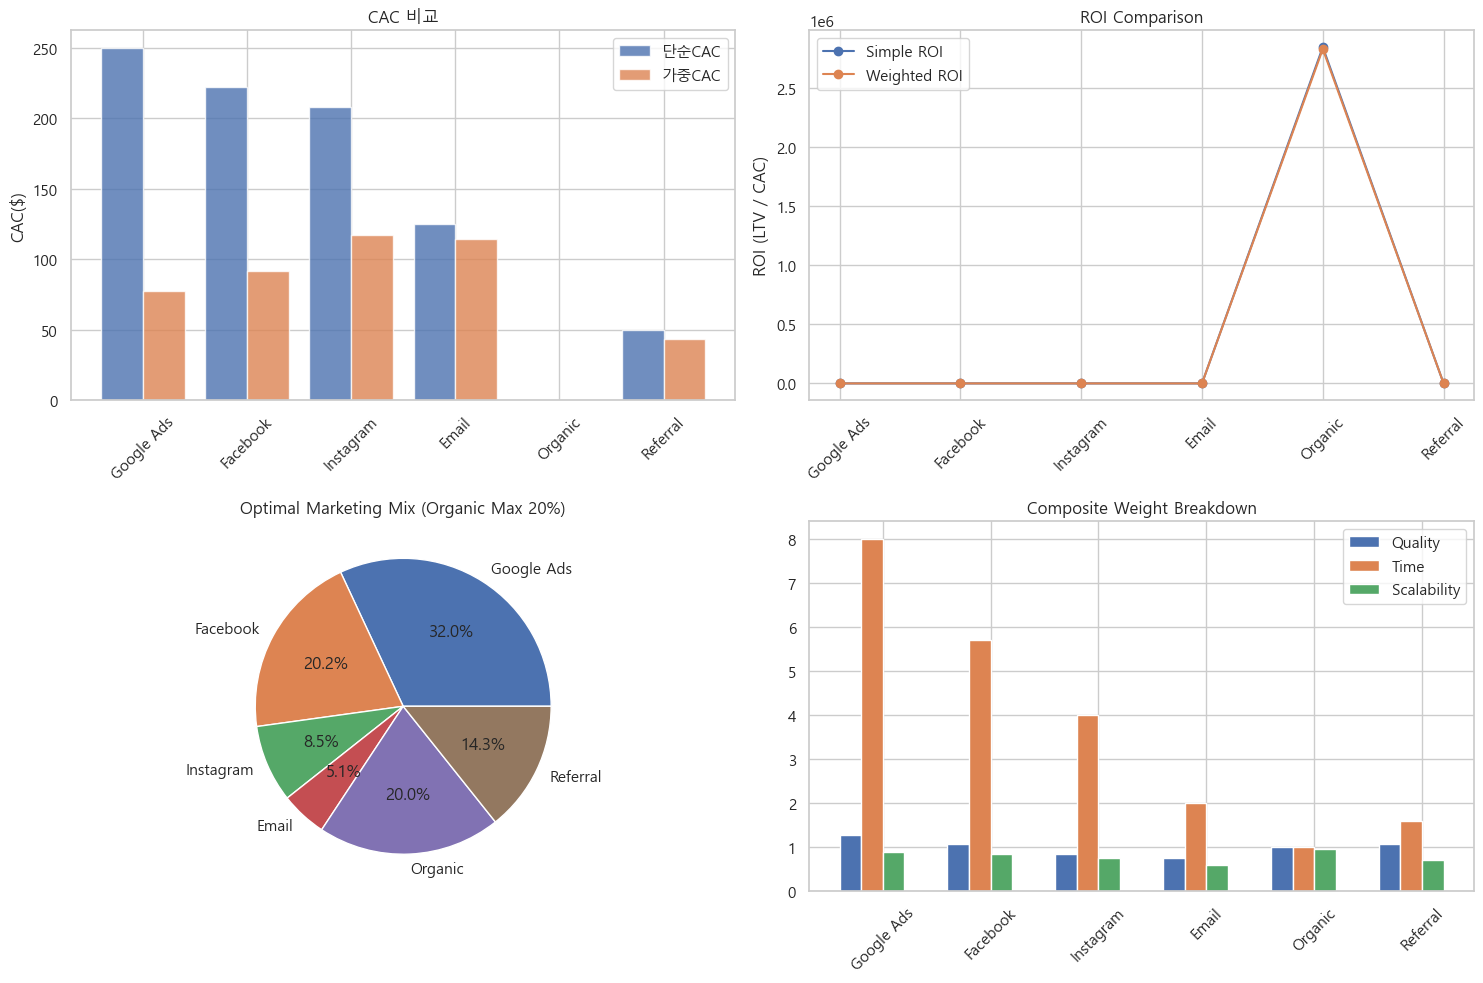

In [ ]:
# # CAC 계산 (Customer Acquisition Cost - 고객 획득 비용)

# perf_df = pd.merge(marketing_data, acquisition_data, on='channel')

# # 1. 'avg_ltv' 고객 퀄리티 가중치 (LTV)
# perf_df['quality_weight'] = perf_df['avg_ltv'] / perf_df['avg_ltv'].mean()

# # 2. 'avg_acq_days' 시간가치 가중치 (획득 속도)
# perf_df['time_weight'] = perf_df['avg_acquisition_days'].max() / perf_df['avg_acquisition_days']

# # 3. 'scalability' 가중치
# perf_df['scalability_weight'] = perf_df['scalability_score'] / 100

# # 종합 가중치 (qw - 50%, tw - 30%, sw - 20%)
# perf_df['composite_weight'] =  (
#     perf_df['quality_weight'] * 0.5 +
#     perf_df['time_weight'] * 0.3 +
#     perf_df['scalability_weight'] * 0.2
# )

# # 일반 CAC 계산 -> 각 채널별 1인 데려오는데 쓴 돈
# perf_df['simple_cac'] = perf_df['marketing_spend'] / perf_df['customers_acquired']

# # 가중치 반영한 CAC 계산
# perf_df['weighted_cac'] = perf_df['simple_cac'] / perf_df['composite_weight']

# perf_df[['channel', 'simple_cac', 'weighted_cac', 'composite_weight']]
# # 4. ROI 계산
# perf_df['simple_roi'] = perf_df['avg_ltv'] / perf_df['simple_cac']
# perf_df['weighted_roi'] = perf_df['avg_ltv'] / perf_df['weighted_cac']

# # 5. 최적 마케팅 믹스 계산
# roi_weights = perf_df['weighted_roi'] * perf_df['customers_acquired']
# roi_weights = roi_weights.fillna(0)
# perf_df['optimal_mix_ratio'] = roi_weights / roi_weights.sum()

# # 6. Organic 상한선 적용 (20%)
# max_organic_ratio = 0.20
# non_organic_weights = perf_df.loc[perf_df['channel'] != 'Organic', 'optimal_mix_ratio']
# non_organic_total = non_organic_weights.sum()
# adjusted_ratios = (non_organic_weights / non_organic_total) * (1 - max_organic_ratio)
# perf_df['adjusted_mix_ratio'] = adjusted_ratios
# perf_df.loc[perf_df['channel'] == 'Organic', 'adjusted_mix_ratio'] = max_organic_ratio

# # 7. 시각화 (4개 차트)
# fig, axes = plt.subplots(2, 2, figsize=(15, 10))
# x_pos = np.arange(len(perf_df))

# a1, a2, a3, a4 = axes[0, 0], axes[0, 1], axes[1, 0], axes[1, 1]

# # 단순 CAC, 가중 CAC 비교
# a1.bar(x_pos-0.2, perf_df['simple_cac'], 0.4, label='단순CAC', alpha=0.8)
# a1.bar(x_pos+0.2, perf_df['weighted_cac'], 0.4, label='가중CAC', alpha=0.8)
# a1.set_title('CAC 비교')
# a1.set_xticks(x_pos)
# a1.set_xticklabels(perf_df['channel'], rotation=45)
# a1.set_ylabel('CAC($)')
# a1.legend()

# # (2) ROI 비교
# a2.plot(perf_df['channel'], perf_df['simple_roi'], marker='o', label='Simple ROI')
# a2.plot(perf_df['channel'], perf_df['weighted_roi'], marker='o', label='Weighted ROI')
# a2.set_title('ROI Comparison')
# a2.set_ylabel('ROI (LTV / CAC)')
# a2.set_xticks(x_pos)
# a2.set_xticklabels(perf_df['channel'], rotation=45)
# a2.legend()

# # (3) 최적 마케팅 믹스 (Pie Chart)
# a3.pie(perf_df['adjusted_mix_ratio'], labels=perf_df['channel'], autopct='%1.1f%%')
# a3.set_title('Optimal Marketing Mix (Organic Max 20%)')

# # (4) 가중치 구성
# a4.bar(x_pos - 0.3, perf_df['quality_weight'], 0.2, label='Quality')
# a4.bar(x_pos - 0.1, perf_df['time_weight'], 0.2, label='Time')
# a4.bar(x_pos + 0.1, perf_df['scalability_weight'], 0.2, label='Scalability')
# a4.set_xticks(x_pos)
# a4.set_xticklabels(perf_df['channel'], rotation=45)
# a4.set_title('Composite Weight Breakdown')
# a4.legend()


# plt.tight_layout()
# plt.show()

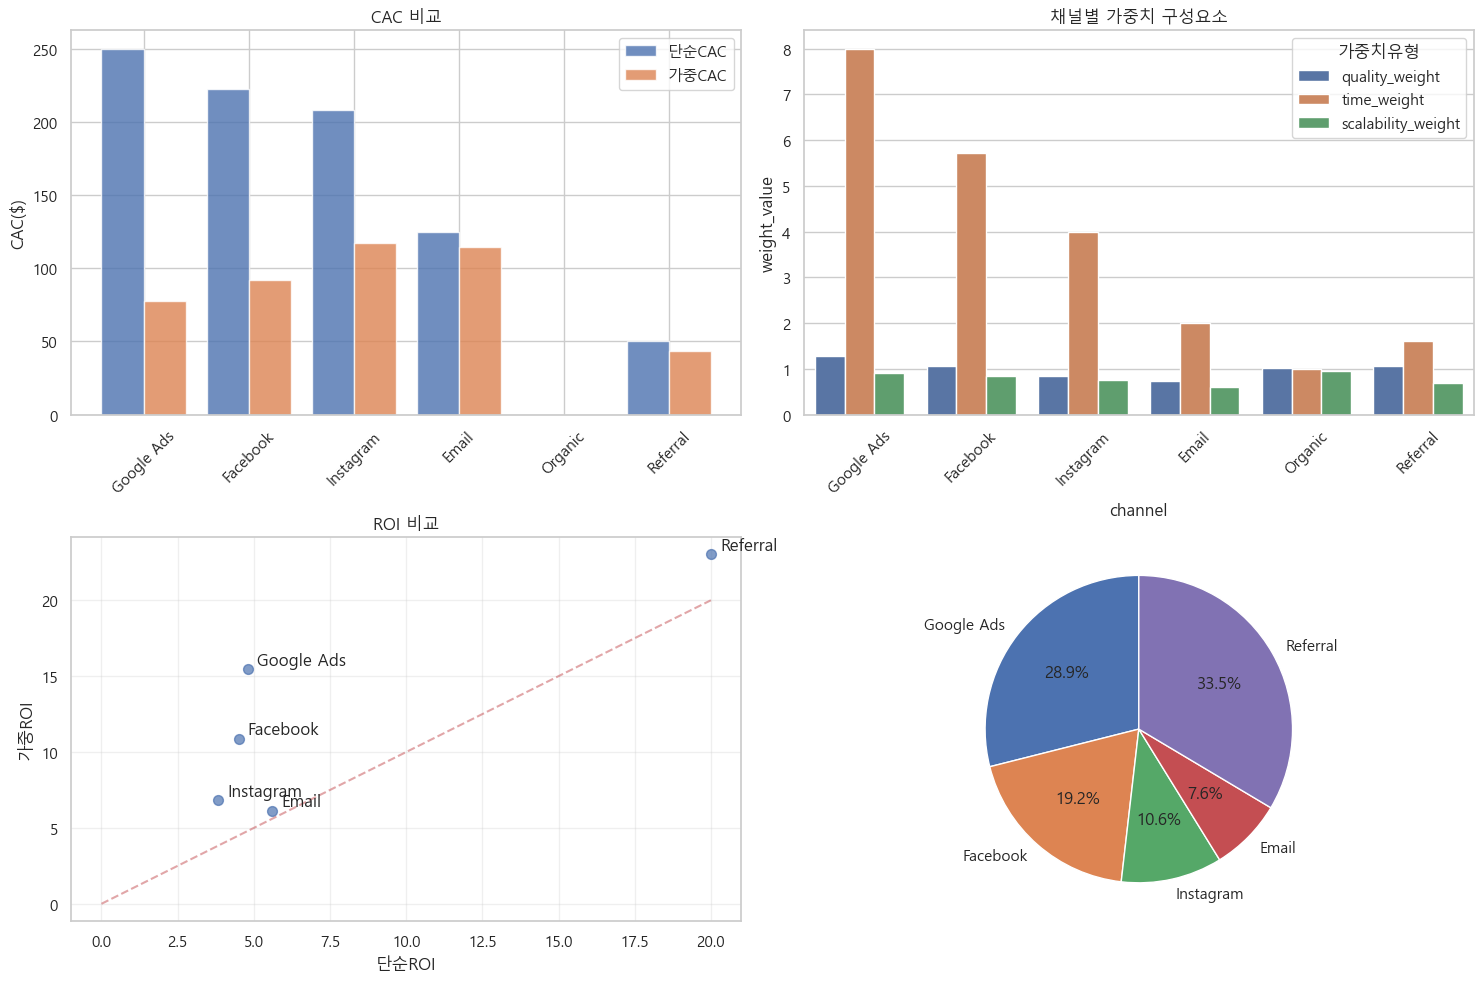

In [44]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
x_pos = np.arange(len(perf_df))
a1, a2, a3, a4 = axes[0, 0], axes[0, 1], axes[1, 0], axes[1, 1]

# 단순 CAC, 가중 CAC 비교
a1.bar(x_pos-0.2, perf_df['simple_cac'], 0.4, label='단순CAC', alpha=0.8)
a1.bar(x_pos+0.2, perf_df['weighted_cac'], 0.4, label='가중CAC', alpha=0.8)
a1.set_title('CAC 비교')
a1.set_xticks(x_pos)
a1.set_xticklabels(perf_df['channel'], rotation=45)
a1.set_ylabel('CAC($)')
a1.legend()

# 가중치 구성요소 분석
weight_comp = perf_df[['channel', 'quality_weight', 'time_weight', 'scalability_weight']]
# pivot <-> melt
weight_melted = weight_comp.melt(id_vars=['channel'], var_name='weight_type', value_name='weight_value')
import seaborn as sns
sns.barplot(data=weight_melted, x='channel', y='weight_value', hue='weight_type', ax=a2)
a2.tick_params(axis='x', rotation=45)
a2.set_title('채널별 가중치 구성요소')
a2.legend(title='가중치유형')


# ROI 분석 (LTV/CAC 비율)
perf_df['simple_roi'] = perf_df['avg_ltv'] / perf_df['simple_cac']
perf_df['weighted_roi'] = perf_df['avg_ltv'] / perf_df['weighted_cac']
# 산점도
a3.scatter(perf_df['simple_roi'], perf_df['weighted_roi'], s=50, alpha=0.7)
# 각 점마다 채널명 표시하기
for idx, channel in enumerate(perf_df['channel']):
    a3.annotate(channel, (perf_df['simple_roi'].iloc[idx]+0.3, perf_df['weighted_roi'].iloc[idx]+0.3))

# 대각선 그리기 -> 선 위의 점들은 과소평가된 채널들 / 선 아래 점들은 점검해볼 채널
a3.plot([0, 20], [0, 20], 'r--', alpha=0.5)

a3.set_title('ROI 비교')
a3.set_xlabel('단순ROI')
a3.set_ylabel('가중ROI')
a3.grid(True, alpha=0.3)

# 최적 마케팅 믹스 제안 (파이 그래프)
"""
ROI 와 Scalability 를 함께 고려할 예정
1. 효율성 지표(Efficiency Score) 라는 항목으로 ROI, 확장성을 동시에 계산 -> 성과도 좋고 확장 여지도 크다
2. 예산 배분 기준 -> 효율성 지표에 따라
"""
budget_opt = perf_df.copy()
# Organic 행 삭제
budget_opt.drop(4, axis=0, inplace=True)
# 숫자가 너무 커서 나눔
budget_opt['eff_score'] = budget_opt['weighted_roi'] * budget_opt['scalability_score'] / 100
budget_opt['recommend_pct'] = budget_opt['eff_score'] / budget_opt['eff_score'].sum() * 100

a4.pie(budget_opt['recommend_pct'], labels=budget_opt['channel'], autopct='%1.1f%%', startangle=90)

plt.tight_layout()
plt.show()

문제 1: 채널별 고객 획득 비용(CAC) 및 생애 가치(LTV) 분석
목표: 마케팅 채널의 진정한 ROI를 평가하기 위해 CAC와 LTV를 계산하고 최적 투자 전략을 제안하세요.
1. 데이터 로드 및 전처리
2. 채널별 CAC 계산
    - 2024년 데이터만 사용 - (2024년 마케팅 데이터만 사용 -> 24년 채널별 마케팅비용 / 24년 신규 획득 고객수)
    - 각 채널별 총 마케팅 비용 집계
    - 각 채널별 신규 고객 수 집계 (2024년 첫 거래 기준)
    - CAC = 총 마케팅 비용 / 신규 고객 수
    - organic과 referral 채널은 CAC = 0으로 처리
3. 고객별 LTV 계산
4. 채널별 LTV 및 ROI 분석 - (24년 신규 고객들의 평균 LTV / 24년 CAC)
    - 채널별 평균 LTV 계산
    - ROI = LTV / CAC 계산 (organic, referral은 무한대 처리)
    - payback period = CAC / (월평균 구매금액) 계산
5. 시각화 및 전략 제안 (15분)
    - CAC vs LTV 산점도 차트
    - 채널별 ROI 막대 차트
    - 마케팅 예산 재배분 제안 (현재 vs 최적 배분)

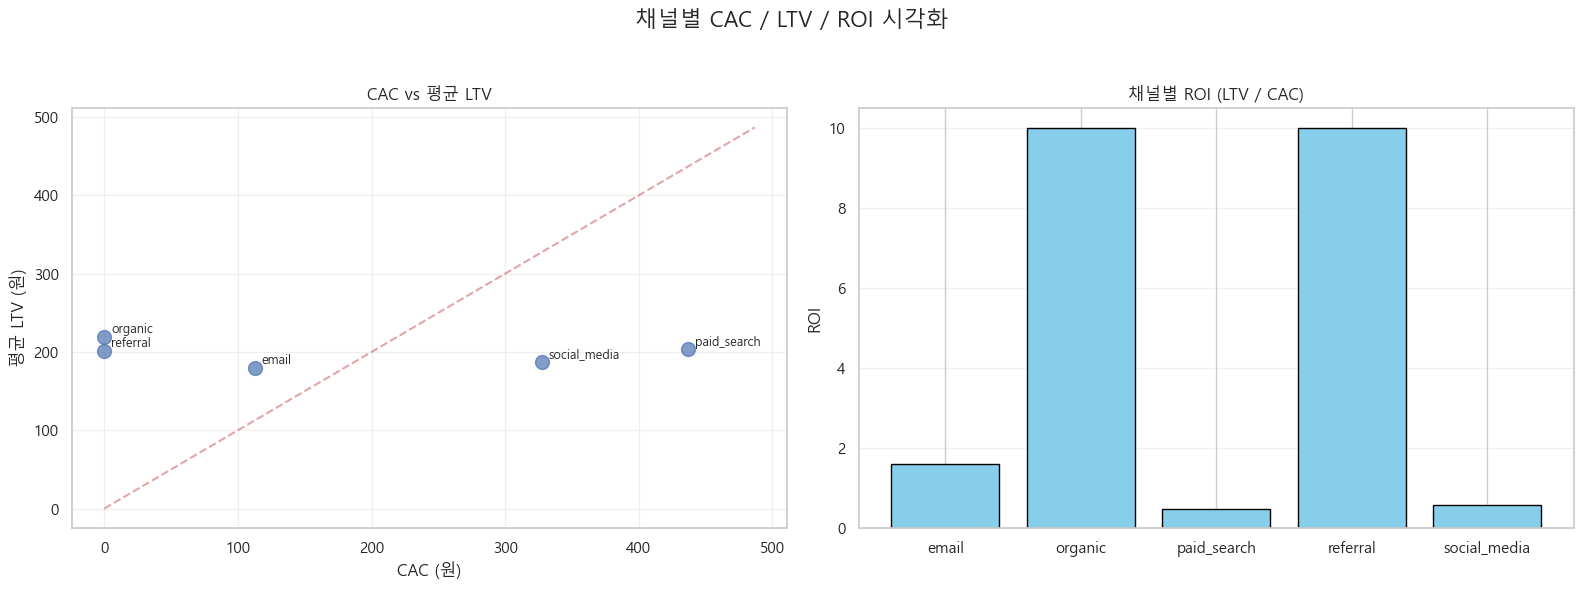

In [56]:
# 📌 필요한 라이브러리 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 📌 한글 폰트 설정 (Windows 기준)
plt.rcParams['font.family'] = 'Malgun Gothic'

# 1. 데이터 로드
satisfaction_df = pd.read_csv("customer_satisfaction.csv")
marketing_df = pd.read_csv("marketing_performance.csv")
transactions_df = pd.read_csv("customer_transactions.csv")

# 2. 날짜형 컬럼 처리
marketing_df['month'] = pd.to_datetime(marketing_df['month'])
transactions_df['transaction_date'] = pd.to_datetime(transactions_df['transaction_date'])
transactions_df['registration_date'] = pd.to_datetime(transactions_df['registration_date'])

# 3. 채널별 CAC 계산 (2024년)
marketing_2024 = marketing_df[marketing_df['month'].dt.year == 2024]
cac_df = marketing_2024.groupby('channel').agg({
    'marketing_spend': 'sum',
    'new_customers': 'sum'
}).reset_index()

cac_df['CAC'] = cac_df.apply(
    lambda row: 0 if row['channel'] in ['organic', 'referral'] else row['marketing_spend'] / row['new_customers'],
    axis=1
)

# 4. 고객별 LTV 계산 (2024년 첫 거래 고객 기준)
first_txn = transactions_df.groupby('customer_id')['transaction_date'].min().reset_index()
first_txn_2024 = first_txn[first_txn['transaction_date'].dt.year == 2024]
ltv_df = transactions_df[transactions_df['customer_id'].isin(first_txn_2024['customer_id'])]

ltv_per_customer = ltv_df.groupby('customer_id')['order_value'].sum().reset_index()
ltv_per_customer.columns = ['customer_id', 'LTV']

# 획득 채널 정보 추가
customer_channels = transactions_df[['customer_id', 'acquisition_channel']].drop_duplicates()
ltv_per_customer = ltv_per_customer.merge(customer_channels, on='customer_id', how='left')

# 채널별 평균 LTV 계산
channel_ltv = ltv_per_customer.groupby('acquisition_channel')['LTV'].mean().reset_index()
channel_ltv.columns = ['channel', 'avg_LTV']

# CAC와 LTV 병합
roi_df = pd.merge(cac_df, channel_ltv, on='channel', how='left')
roi_df['ROI'] = roi_df.apply(lambda row: np.inf if row['CAC'] == 0 else row['avg_LTV'] / row['CAC'], axis=1)

# ✅ 월평균 구매금액 계산 (month_diff 계산 방식 수정)
# 고객별 마지막 거래일
last_txn = ltv_df.groupby('customer_id')['transaction_date'].max().reset_index()
last_txn.columns = ['customer_id', 'last_transaction_date']

# 등록일
registration = ltv_df[['customer_id', 'registration_date']].drop_duplicates()

# 병합 후 월 수 계산
activity_df = last_txn.merge(registration, on='customer_id')
activity_df['month_diff'] = (
    (activity_df['last_transaction_date'].dt.year - activity_df['registration_date'].dt.year) * 12 +
    (activity_df['last_transaction_date'].dt.month - activity_df['registration_date'].dt.month)
).clip(lower=1)

# 고객별 총 거래금액
order_sum = ltv_df.groupby('customer_id')['order_value'].sum().reset_index()
order_sum.columns = ['customer_id', 'total_order_value']

# 병합 후 월평균 구매금액 계산
activity_df = activity_df.merge(order_sum, on='customer_id')
activity_df['monthly_avg'] = activity_df['total_order_value'] / activity_df['month_diff']
activity_df = activity_df.merge(customer_channels, on='customer_id')

# 채널별 평균 월 구매금액 계산
channel_monthly_avg = activity_df.groupby('acquisition_channel')['monthly_avg'].mean().reset_index()
channel_monthly_avg.columns = ['channel', 'monthly_avg_order']
roi_df = roi_df.merge(channel_monthly_avg, on='channel', how='left')

# payback period = CAC / 월평균구매금액
roi_df['payback_period'] = roi_df.apply(
    lambda row: np.nan if row['CAC'] == 0 else row['CAC'] / row['monthly_avg_order'], axis=1
)

# 5. ROI 기반 최적 예산 재배분 시뮬레이션
total_budget = marketing_2024['marketing_spend'].sum()
paid_channels = roi_df[roi_df['CAC'] > 0].copy()
paid_channels['roi_weight'] = paid_channels['ROI'] / paid_channels['ROI'].sum()
paid_channels['optimal_budget'] = paid_channels['roi_weight'] * total_budget
paid_channels['expected_new_customers'] = paid_channels['optimal_budget'] / paid_channels['CAC']
paid_channels['expected_total_LTV'] = paid_channels['expected_new_customers'] * paid_channels['avg_LTV']

# 6. 시각화 (CAC vs LTV, ROI)
fig, axs = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('채널별 CAC / LTV / ROI 시각화', fontsize=16)

# CAC vs LTV 산점도
axs[0].scatter(roi_df['CAC'], roi_df['avg_LTV'], s=100, alpha=0.7)
for i, row in roi_df.iterrows():
    axs[0].annotate(row['channel'], (row['CAC'] + 5, row['avg_LTV'] + 5), fontsize=9)
axs[0].plot([0, roi_df['CAC'].max() + 50], [0, roi_df['CAC'].max() + 50], 'r--', alpha=0.5)
axs[0].set_title('CAC vs 평균 LTV')
axs[0].set_xlabel('CAC (원)')
axs[0].set_ylabel('평균 LTV (원)')
axs[0].grid(True, alpha=0.3)

# ROI 막대 그래프
roi_plot_df = roi_df.copy()
roi_plot_df['ROI'] = roi_plot_df['ROI'].replace(np.inf, 10)  # 무한대 ROI는 10으로 제한
axs[1].bar(roi_plot_df['channel'], roi_plot_df['ROI'], color='skyblue', edgecolor='black')
axs[1].set_title('채널별 ROI (LTV / CAC)')
axs[1].set_ylabel('ROI')
axs[1].grid(True, axis='y', alpha=0.3)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


문제 2: 고객 코호트 분석 및 유지율 개선 전략
목표: "월별 가입 코호트"의 유지율과 매출 기여도를 분석하여 고객 유지 전략을 수립하세요.
1. 코호트 그룹 생성
2. 월별 유지율 계산
    - 각 거래의 코호트 대비 경과 개월 수 계산
    - 코호트별 Month 0, 1, 2, ... 12에서의 활성 고객 수
    - 유지율 테이블 생성 (코호트 × 경과월)
    - 평균 유지율 곡선 계산
3. 코호트별 매출 기여도 분석
    - 각 코호트의 월별 누적 매출 계산
    - 코호트별 고객 1인당 누적 매출 (ARPU) 계산
    - 6개월 후, 12개월 후 예상 LTV 추정
4. 유지율 히트맵 시각화
5. 개선 전략 수립
    - 유지율이 급격히 감소하는 시점 식별
    - 고성과 코호트 vs 저성과 코호트 특성 비교
    - 유지율 개선을 위한 액션 아이템 3가지 제안

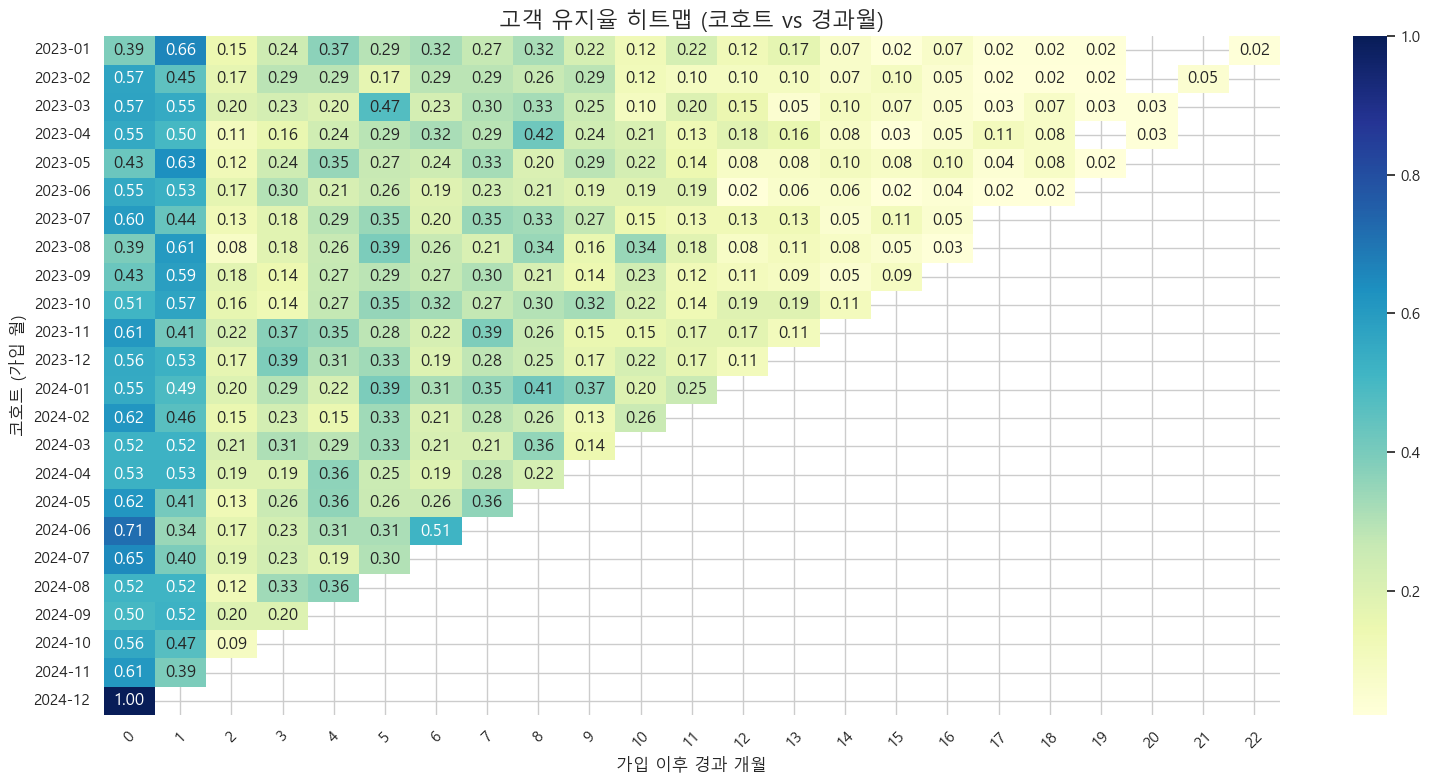

📊 평균 유지율 곡선 (0~12개월):
months_since
0     0.5645
1     0.5005
2     0.1589
3     0.2444
4     0.2816
5     0.3116
6     0.2636
7     0.2935
8     0.2926
9     0.2220
10    0.1950
11    0.1652
12    0.1201
dtype: float64

💵 ARPU 샘플 (상위 5개 코호트):
months_since     0      1       2       3       4       5       6       7   \
cohort_month                                                                 
2023-01       30.70  82.29   89.49  112.99  144.10  165.82  198.42  224.59   
2023-02       44.60  82.91   94.61  113.67  132.02  152.23  173.82  206.41   
2023-03       43.68  82.44   97.94  119.96  141.05  193.42  225.45  249.39   
2023-04       45.69  90.30  100.90  113.80  131.24  157.18  193.96  233.23   
2023-05       36.20  81.65   89.99  114.03  143.73  166.14  187.13  212.58   

months_since      8       9   ...      13      14      15      16      17  \
cohort_month                  ...                                           
2023-01       246.13  267.42  ...  324.00  330.34  333.0

In [61]:
# 📌 라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from operator import attrgetter

# 📌 한글 폰트 설정 (Windows)
plt.rcParams['font.family'] = 'Malgun Gothic'

# 📌 1. 데이터 준비 및 코호트 정보 생성
cohort_df = transactions_df.copy()
cohort_df['transaction_date'] = pd.to_datetime(cohort_df['transaction_date'])
cohort_df['registration_date'] = pd.to_datetime(cohort_df['registration_date'])

cohort_df['cohort_month'] = cohort_df['registration_date'].dt.to_period('M')
cohort_df['order_month'] = cohort_df['transaction_date'].dt.to_period('M')
cohort_df['months_since'] = (cohort_df['order_month'] - cohort_df['cohort_month']).apply(attrgetter('n'))

# 📌 2. 코호트별 고객 유지율 계산

# 고객 기준 중복 제거 → 월별 활성 고객 수
unique_active = (
    cohort_df.drop_duplicates(subset=['customer_id', 'order_month'])
    .groupby(['cohort_month', 'months_since'])['customer_id']
    .nunique()
    .reset_index()
)

# 피벗 테이블로 전환
cohort_counts = unique_active.pivot(index='cohort_month', columns='months_since', values='customer_id')

# ❗ 정확한 분모: registration_date 기준 고유 고객 수
correct_cohort_sizes = (
    transactions_df
    .copy()
    .assign(cohort_month=lambda df: df['registration_date'].dt.to_period('M'))
    .groupby('cohort_month')['customer_id']
    .nunique()
)

# 유지율 계산
retention_rate = cohort_counts.divide(correct_cohort_sizes, axis=0).round(4)
average_retention = retention_rate.mean().round(4)

# 📌 3. 코호트별 매출 기여도 분석
monthly_sales = (
    cohort_df
    .groupby(['cohort_month', 'months_since'])['order_value']
    .sum()
    .reset_index()
    .pivot(index='cohort_month', columns='months_since', values='order_value')
)

# 누적 매출
cumulative_sales = monthly_sales.cumsum(axis=1)

# 고객 1인당 누적 매출 (ARPU)
arpu = cumulative_sales.divide(correct_cohort_sizes, axis=0).round(2)

# 평균 LTV 추정
ltv_6 = arpu[6].mean() if 6 in arpu.columns else np.nan
ltv_12 = arpu[12].mean() if 12 in arpu.columns else np.nan

# 📌 4. 히트맵 시각화
plt.figure(figsize=(16, 8))
sns.heatmap(retention_rate, annot=True, fmt=".2f", cmap="YlGnBu", cbar=True)
plt.title("고객 유지율 히트맵 (코호트 vs 경과월)", fontsize=16)
plt.xlabel("가입 이후 경과 개월")
plt.ylabel("코호트 (가입 월)")
plt.yticks(rotation=0)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 📌 5. 분석 결과 출력
print("📊 평균 유지율 곡선 (0~12개월):")
print(average_retention.head(13))

print("\n💵 ARPU 샘플 (상위 5개 코호트):")
print(arpu.head())

print(f"\n✅ 6개월 후 예상 LTV: ${ltv_6:.2f}")
print(f"✅ 12개월 후 예상 LTV: ${ltv_12:.2f}")


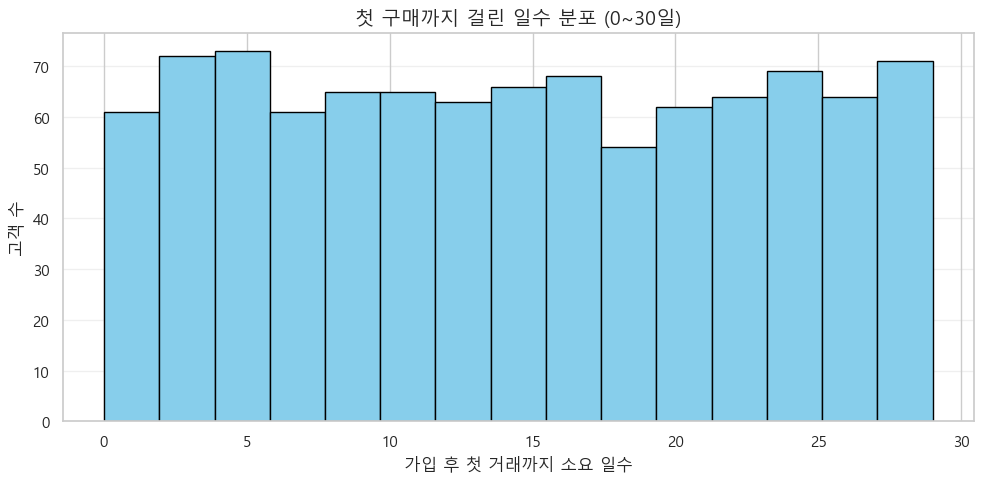

In [63]:
import pandas as pd
import matplotlib.pyplot as plt

# 📌 한글 폰트 설정 (로컬 실행 시 필요)
plt.rcParams['font.family'] = 'Malgun Gothic'

# 1. 데이터 로드 및 날짜 변환
transactions_df = pd.read_csv("customer_transactions.csv", parse_dates=['transaction_date', 'registration_date'])

# 2. 고객별 첫 거래일 및 가입일 계산
first_purchase = (
    transactions_df
    .sort_values(by='transaction_date')
    .groupby('customer_id')['transaction_date']
    .first()
    .reset_index()
)

first_purchase = first_purchase.merge(
    transactions_df[['customer_id', 'registration_date']].drop_duplicates(),
    on='customer_id',
    how='left'
)

# 3. 첫 거래까지 걸린 일수 계산
first_purchase['days_to_first_purchase'] = (
    first_purchase['transaction_date'] - first_purchase['registration_date']
).dt.days

# 4. 0~30일 사이 데이터만 필터링
cleaned_days = first_purchase['days_to_first_purchase']
cleaned_days = cleaned_days[(cleaned_days >= 0) & (cleaned_days <= 30) & (cleaned_days.notnull())]

# 5. 히스토그램 시각화
plt.figure(figsize=(10, 5))
plt.hist(cleaned_days, bins=15, color='skyblue', edgecolor='black')  # 2일 간격 구간
plt.title("첫 구매까지 걸린 일수 분포 (0~30일)", fontsize=14)
plt.xlabel("가입 후 첫 거래까지 소요 일수")
plt.ylabel("고객 수")
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# ------------------------------------------------------------------------------
# 🎯 인사이트 요약:
# - 고객의 대부분은 가입 후 1~5일 내 첫 구매를 완료
# - 6~15일 사이에도 전환이 지속적으로 발생
# - 20일 이후에는 전환률이 급격히 감소

# 📌 마케팅 전략 제안:
# 1. 0~5일:
#    - 가입 즉시 첫 구매 유도 쿠폰/혜택 제공 (ex. 할인, 무료배송)
#    - 웰컴 프로모션 강화

# 2. 6~15일:
#    - 리마인드 푸시, SMS, 이메일 발송
#    - 추천 상품 기반 전환 유도

# 3. 16~30일:
#    - “혜택 종료 임박” 강조
#    - 타겟팅 광고 또는 전환 설득 콘텐츠 운영

# 4. 30일 이후:
#    - 전환 가능성 낮은 그룹 → 저효율 타겟 제외 고려
# ------------------------------------------------------------------------------
